# EDA of Garmin and supporting data

In [67]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # pandas dataframe
import os
from glob import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
garmin_base_dir = "../files/Garmin_20241403/DI_CONNECT"

pd.set_option('display.max_columns', 500)


# Building the health DataFrames

Combine json files into dataframes of healh data 
- Garmin daily health data files can be found in the Garmin-folder DI_CONNECT/DI-Connect-Aggregator, which contains json files starting with UDS.
- remove data from before 2020 (no watch), but there are some weird data rows?
- Also wellness data in DI_CONNECT/DI-Connect-Wellness

- Avtivities?

In [87]:
# Files
#  DI-Connect-Aggregator
#  DI-Connect-Welness
# Find activities?

# Function to load JSONs and combine them into a filtered DataFrame
def load_and_filter_json(base, file, substr, start_year=2020):
    all_dfs = []
    path = os.path.join(base, file)
    for root, _, files in os.walk(path):
        json_files = [f for f in sorted(files) if f.endswith('.json') and substr in f]
        for file in json_files:
            with open(os.path.join(root, file), 'r') as f:
                data = json.load(f)
#            df = pd.DataFrame(data) if isinstance(data, list) else pd.DataFrame([data])
            df = pd.json_normalize(data, sep='_')
            all_dfs.append(df)


    # Combining and filtering the data
    if all_dfs:
        full_df = pd.concat(all_dfs, ignore_index=True)

        # Check if 'metaData_calendarDate' column exists before trying to access it
        if 'metaData_calendarDate' in full_df.columns:
            full_df['calendarDate'] = pd.to_datetime(full_df['metaData_calendarDate'])
        elif 'calendarDate' in full_df.columns:
            full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        else:
            print("No 'calendarDate' column found in data")
            return pd.DataFrame()  # Return empty DataFrame if column is missing
        
        full_df['calendarDate'] = pd.to_datetime(full_df['calendarDate'])
        full_df = full_df.loc[full_df['calendarDate'].dt.year >= start_year]#, columns_of_interest]
        return full_df
    return pd.DataFrame()  # Return empty DataFrame if no data was loaded
    

start_year = 2020

# DataFrames from json-files, combined
aggregator_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Aggregator", 'UDS', start_year)
sleep_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Wellness", 'sleepData', start_year)
bio_df = load_and_filter_json(garmin_base_dir, "DI-Connect-Wellness", 'userBioMetrics', start_year)

#df.loc[df['column_name'] == some_value]

### Aggregator_df containing most data

In [88]:
print(aggregator_df.columns)
aggregator_df

Index(['userProfilePK', 'calendarDate', 'uuid', 'durationInMilliseconds',
       'consumedKilocalories', 'remainingKilocalories',
       'includesCalorieConsumedData', 'version', 'totalKilocalories',
       'activeKilocalories', 'burnedKilocalories', 'totalDistanceMeters',
       'includesWellnessData', 'includesActivityData', 'bmrKilocalories',
       'wellnessKilocalories', 'wellnessTotalKilocalories',
       'wellnessActiveKilocalories', 'totalSteps', 'dailyStepGoal',
       'wellnessDistanceMeters', 'wellnessStartTimeGmt', 'wellnessEndTimeGmt',
       'wellnessStartTimeLocal', 'wellnessEndTimeLocal', 'highlyActiveSeconds',
       'activeSeconds', 'moderateIntensityMinutes', 'vigorousIntensityMinutes',
       'floorsAscendedInMeters', 'floorsDescendedInMeters',
       'userIntensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate',
       'maxHeartRate', 'restingHeartRate', 'currentDayRestingHeartRate',
       'restingHeartRateTimestamp', 'includesSingleMeasurement',
       'in

,userProfilePK,calendarDate,uuid,durationInMilliseconds,consumedKilocalories,remainingKilocalories,includesCalorieConsumedData,version,totalKilocalories,activeKilocalories,burnedKilocalories,totalDistanceMeters,includesWellnessData,includesActivityData,bmrKilocalories,wellnessKilocalories,wellnessTotalKilocalories,wellnessActiveKilocalories,totalSteps,dailyStepGoal,wellnessDistanceMeters,wellnessStartTimeGmt,wellnessEndTimeGmt,wellnessStartTimeLocal,wellnessEndTimeLocal,highlyActiveSeconds,activeSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,floorsAscendedInMeters,floorsDescendedInMeters,userIntensityMinutesGoal,userFloorsAscendedGoal,minHeartRate,maxHeartRate,restingHeartRate,currentDayRestingHeartRate,restingHeartRateTimestamp,includesSingleMeasurement,includesContinuousMeasurement,includesAllDayPulseOx,includesSleepPulseOx,source,minAvgHeartRate,maxAvgHeartRate,lowestSpo2Value,latestSpo2Value,latestSpo2ValueReadingTimeGmt,latestSpo2ValueReadingTimeLocal,allDayStress_userProfilePK,allDayStress_calendarDate,allDayStress_aggregatorList,bodyBattery_userProfilePK,bodyBattery_calendarDate,bodyBattery_chargedValue,bodyBattery_drainedValue,bodyBattery_bodyBatteryVersion,bodyBattery_bodyBatteryStatList,hydration_userProfilePK,hydration_calendarDate,hydration_valueInML,hydration_activityIntakeInML,hydration_goalInML,hydration_capped,hydration_sweatLossInML,hydration_adjustedGoalInML,hydration_lastEntryTimestampLocal,respiration_userProfilePK,respiration_calendarDate,respiration_avgWakingRespirationValue,respiration_highestRespirationValue,respiration_lowestRespirationValue,respiration_latestRespirationValue,respiration_latestRespirationTimeGMT,averageSpo2Value,netCalorieGoal,dailyTotalFromEpochData,restingCaloriesFromActivity,isVigorousDay
14,86607424,2020-06-18,18de2ff7644a48d3bbc44785a8d746ad,86400000,NaN,1923.0,False,74280002,1923.0,446.0,NaN,10037.0,True,True,1477.0,1923.0,1923.0,446.0,13987.0,10000.0,10037.0,2020-06-17T22:00:00.0,2020-06-18T22:00:00.0,2020-06-18T00:00:00.0,2020-06-19T00:00:00.0,7480.0,1476.0,11.0,0.0,47.313,41.145,180.0,10.0,64.0,128.0,68.0,68.0,1.592518e+12,True,False,False,False,0.0,65.0,121.0,95.0,95.0,2020-06-18T20:14:00.0,2020-06-18T22:14:00.0,86607424.0,2020-06-18,"[{'type': 'TOTAL', 'averageStressLevel': 40, '...",86607424.0,2020-06-18,13.0,38.0,1.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",86607424.0,2020-06-18,0.0,0.0,2129.0,False,302.0,2431.0,2020-06-18T15:20:37.0,86607424.0,2020-06-18,14.0,23.0,4.0,17.0,2020-06-18T22:00:00.0,NaN,NaN,NaN,NaN,NaN
15,86607424,2020-06-19,94fe702aadb840e79b86f5e430e35880,86400000,NaN,1885.0,False,63840002,1885.0,408.0,NaN,9329.0,True,True,1477.0,1885.0,1885.0,408.0,12455.0,10000.0,9329.0,2020-06-18T22:00:00.0,2020-06-19T22:00:00.0,2020-06-19T00:00:00.0,2020-06-20T00:00:00.0,5162.0,2430.0,2.0,10.0,31.366,76.475,180.0,10.0,55.0,160.0,64.0,59.0,1.592604e+12,True,False,True,False,0.0,56.0,158.0,85.0,97.0,2020-06-19T22:00:00.0,2020-06-20T00:00:00.0,86607424.0,2020-06-19,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",86607424.0,2020-06-19,86.0,38.0,1.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",86607424.0,2020-06-19,0.0,0.0,2129.0,False,467.0,2596.0,2020-06-19T16:27:16.0,86607424.0,2020-06-19,13.0,21.0,6.0,20.0,2020-06-19T22:00:00.0,96.0,NaN,NaN,NaN,NaN
16,86607424,2020-06-20,734de901672a4d10834648af9183a61e,86400000,NaN,2456.0,False,82320003,2456.0,975.0,NaN,21728.0,True,True,1481.0,2456.0,2456.0,975.0,26379.0,10000.0,21728.0,2020-06-19T22:00:00.0,2020-06-20T22:00:00.0,2020-06-20T00:00:00.0,2020-06-21T00:00:00.0,9014.0,2798.0,20.0,88.0,60.259,66.790,180.0,10.0,53.0,159.0,62.0,58.0,1.592690e+12,True,False,True,True,0.0,54.0,156.0,84.0,94.0,2020-06-20T22:00:00.0,2020-06-21T00:00:00.0,86607424.0,2020-06-20,"[{'type': 'TOTAL', 'averageStressLevel': 15, '...",86607424.0,2020-06-20,74.0,71.0,1.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",86607424.0,2020-06-20,0.0,0.0,2129.0,False,988.0,3117.0,2020-06-20T15:54:58.0,86607424.0,2020-06-20,12.0

In [89]:
# chose only intersting columns

focus_columns_agg = ['calendarDate', 'totalKilocalories', 'activeKilocalories', 'allDayStress_aggregatorList', 
                       'includesWellnessData', 'includesActivityData',
                       'totalSteps', 'highlyActiveSeconds', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 
                       'highlyActiveSeconds', 'userIntensityMinutesGoal', 
                       'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'minAvgHeartRate', 'maxAvgHeartRate',
                       'bodyBattery_chargedValue', 'bodyBattery_drainedValue', 'bodyBattery_bodyBatteryStatList',
                         'restingCaloriesFromActivity', 'isVigorousDay']

focus_agg_df = aggregator_df[focus_columns_agg]

#focus_agg_df =  aggregator_df.loc[aggregator_df['calendarDate'].dt.year<=2020, focus_columns_agg]
focus_agg_df

,calendarDate,totalKilocalories,activeKilocalories,allDayStress_aggregatorList,includesWellnessData,includesActivityData,totalSteps,highlyActiveSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,highlyActiveSeconds,userIntensityMinutesGoal,minHeartRate,maxHeartRate,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,bodyBattery_chargedValue,bodyBattery_drainedValue,bodyBattery_bodyBatteryStatList,restingCaloriesFromActivity,isVigorousDay
14,2020-06-18,1923.0,446.0,"[{'type': 'TOTAL', 'averageStressLevel': 40, '...",True,True,13987.0,7480.0,11.0,0.0,7480.0,180.0,64.0,128.0,68.0,65.0,121.0,13.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
15,2020-06-19,1885.0,408.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12455.0,5162.0,2.0,10.0,5162.0,180.0,55.0,160.0,64.0,56.0,158.0,86.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
16,2020-06-20,2456.0,975.0,"[{'type': 'TOTAL', 'averageStressLevel': 15, '...",True,True,26379.0,9014.0,20.0,88.0,9014.0,180.0,53.0,159.0,62.0,54.0,156.0,74.0,71.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
17,2020-06-21,2202.0,734.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,12401.0,5280.0,52.0,4.0,5280.0,180.0,50.0,139.0,60.0,52.0,134.0,40.0,81.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
18,2020-06-22,2017.0,549.0,"[{'type': 'TOTAL', 'averageStressLevel': 25, '...",True,True,15256.0,6691.0,5.0,43.0,6691.0,180.0,53.0,152.0,60.0,54.0,149.0,49.0,54.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,2024-03-10,2038.0,581.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,13169.0,3086.0,3.0,25.0,3086.0,500.0,50.0,148.0,60.0,51.0,146.0,52.0,11.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",24.0,True
1375,2024-03-11,2231.0,774.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12551.0,2202.0,5.0,38.0,2202.0,500.0,54.0,161.0,60.0,55.0,160.0,79.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",38.0,True
1376,2024-03-12,2762.0,1305.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,11733.0,3126.0,44.0,98.0,3126.0,500.0,55.0,147.0,60.0,56.0,146.0,42.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",170.0,True
1377,2024-03-13,2372.0,915.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,16581.0,4380.0,19.0,49.0,4380.0,500.0,55.0,148.0,60.0,55.0,146.0,65.0,53.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",65.0,True


### Sleep_df, hours of sleep I guess

In [90]:
sleep_df.head()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,retro,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,spo2SleepSummary_userProfilePk,spo2SleepSummary_deviceId,spo2SleepSummary_sleepMeasurementStartGMT,spo2SleepSummary_sleepMeasurementEndGMT,spo2SleepSummary_alertThresholdValue,spo2SleepSummary_averageSPO2,spo2SleepSummary_averageHR,spo2SleepSummary_lowestSPO2
0,2020-06-17T21:00:00.0,2020-06-18T04:00:00.0,2020-06-18,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-18T21:25:00.0,2020-06-19T03:46:00.0,2020-06-19,ENHANCED_CONFIRMED_FINAL,False,2880.0,15600.0,3720.0,660.0,0.0,16.0,6.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-19T19:58:00.0,2020-06-20T04:14:00.0,2020-06-20,ENHANCED_CONFIRMED_FINAL,False,3660.0,16020.0,8100.0,840.0,1140.0,16.0,7.0,21.0,86607424.0,3.334930e+09,2020-06-19T20:52:00.0,2020-06-20T04:00:00.0,0.0,93.0,60.0,84.0
3,2020-06-20T21:56:00.0,2020-06-21T04:52:00.0,2020-06-21,ENHANCED_CONFIRMED_FINAL,False,3120.0,15180.0,5640.0,1020.0,0.0,15.0,7.0,18.0,86607424.0,3.334930e+09,2020-06-20T21:57:00.0,2020-06-21T04:00:00.0,NaN,95.0,58.0,93.0
4,2020-06-21T21:09:00.0,2020-06-22T04:55:00.0,2020-06-22,ENHANCED_CONFIRMED_FINAL,False,3120.0,17400.0,7320.0,120.0,0.0,16.0,6.0,21.0,86607424.0,3.334930e+09,2020-06-21T21:10:00.0,2020-06-22T04:00:00.0,0.0,96.0,60.0,87.0


In [91]:
print(sleep_df.columns)
focus_columns_well = ['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
                     'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds','unmeasurableSeconds',
                     ]

Index(['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
       'sleepWindowConfirmationType', 'retro', 'deepSleepSeconds',
       'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds',
       'unmeasurableSeconds', 'averageRespiration', 'lowestRespiration',
       'highestRespiration', 'spo2SleepSummary_userProfilePk',
       'spo2SleepSummary_deviceId',
       'spo2SleepSummary_sleepMeasurementStartGMT',
       'spo2SleepSummary_sleepMeasurementEndGMT',
       'spo2SleepSummary_alertThresholdValue', 'spo2SleepSummary_averageSPO2',
       'spo2SleepSummary_averageHR', 'spo2SleepSummary_lowestSPO2'],
      dtype='object')


In [92]:
focus_sleep_df = sleep_df[focus_columns_well]
focus_sleep_df

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds
0,2020-06-17T21:00:00.0,2020-06-18T04:00:00.0,2020-06-18,NaN,NaN,NaN,NaN,NaN
1,2020-06-18T21:25:00.0,2020-06-19T03:46:00.0,2020-06-19,2880.0,15600.0,3720.0,660.0,0.0
2,2020-06-19T19:58:00.0,2020-06-20T04:14:00.0,2020-06-20,3660.0,16020.0,8100.0,840.0,1140.0
3,2020-06-20T21:56:00.0,2020-06-21T04:52:00.0,2020-06-21,3120.0,15180.0,5640.0,1020.0,0.0
4,2020-06-21T21:09:00.0,2020-06-22T04:55:00.0,2020-06-22,3120.0,17400.0,7320.0,120.0,0.0
...,...,...,...,...,...,...,...,...
1359,2024-03-09T22:12:00.0,2024-03-10T07:39:00.0,2024-03-10,9780.0,18060.0,5880.0,300.0,0.0
1360,2024-03-10T18:04:00.0,2024-03-11T04:45:00.0,2024-03-11,4560.0,22500.0,9420.0,1980.0,0.0
1361,2024-03-11T20:14:00.0,2024-03-12T04:25:00.0,2024-03-12,2580.0,17880.0,8160.0,840.0,0.0
1362,2024-03-12T22:03:00.0,2024-03-13T02:10:00.0,2024-03-13,5220.0,4680.0,2760.0,240.0,1920.0


### bio_df containing vo2max

In [93]:
vo2max_df = bio_df[['calendarDate', 'vo2MaxRunning']]
vo2max_df

,calendarDate,vo2MaxRunning
0,2020-06-18 00:00:00.000,42.0
1,2020-06-18 00:00:00.000,42.0
2,2020-06-18 05:30:15.000,NaN
3,2020-06-18 10:33:40.140,NaN
4,2020-06-18 10:36:33.958,NaN
...,...,...
1362,2024-03-07 00:00:00.000,51.0
1363,2024-03-09 00:00:00.000,51.0
1364,2024-03-10 00:00:00.000,51.0
1365,2024-03-12 00:00:00.000,50.0


In [104]:
#focus_agg_df[['allDayStress_aggregatorList']].iat[0,0]

def extract_total_average_stress(row):
    if isinstance(row, list):  # Check if the row is actually a list
        total_entry = next((item for item in row if item['type'] == 'TOTAL'), None)
        return total_entry['averageStressLevel'] if total_entry else None
    return None  # Return None or a default value if the row is not a list


# Apply the function and create a new column
focus_agg_df.loc[:, 'totalAverageStressLevel'] = focus_agg_df['allDayStress_aggregatorList'].apply(extract_total_average_stress)

focus_agg_df

,calendarDate,totalKilocalories,activeKilocalories,allDayStress_aggregatorList,includesWellnessData,includesActivityData,totalSteps,highlyActiveSeconds,moderateIntensityMinutes,vigorousIntensityMinutes,highlyActiveSeconds,userIntensityMinutesGoal,minHeartRate,maxHeartRate,restingHeartRate,minAvgHeartRate,maxAvgHeartRate,bodyBattery_chargedValue,bodyBattery_drainedValue,bodyBattery_bodyBatteryStatList,restingCaloriesFromActivity,isVigorousDay,totalAverageStressLevel
14,2020-06-18,1923.0,446.0,"[{'type': 'TOTAL', 'averageStressLevel': 40, '...",True,True,13987.0,7480.0,11.0,0.0,7480.0,180.0,64.0,128.0,68.0,65.0,121.0,13.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,40.0
15,2020-06-19,1885.0,408.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12455.0,5162.0,2.0,10.0,5162.0,180.0,55.0,160.0,64.0,56.0,158.0,86.0,38.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,20.0
16,2020-06-20,2456.0,975.0,"[{'type': 'TOTAL', 'averageStressLevel': 15, '...",True,True,26379.0,9014.0,20.0,88.0,9014.0,180.0,53.0,159.0,62.0,54.0,156.0,74.0,71.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,15.0
17,2020-06-21,2202.0,734.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,12401.0,5280.0,52.0,4.0,5280.0,180.0,50.0,139.0,60.0,52.0,134.0,40.0,81.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,29.0
18,2020-06-22,2017.0,549.0,"[{'type': 'TOTAL', 'averageStressLevel': 25, '...",True,True,15256.0,6691.0,5.0,43.0,6691.0,180.0,53.0,152.0,60.0,54.0,149.0,49.0,54.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",NaN,NaN,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,2024-03-10,2038.0,581.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,13169.0,3086.0,3.0,25.0,3086.0,500.0,50.0,148.0,60.0,51.0,146.0,52.0,11.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",24.0,True,29.0
1375,2024-03-11,2231.0,774.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,12551.0,2202.0,5.0,38.0,2202.0,500.0,54.0,161.0,60.0,55.0,160.0,79.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",38.0,True,20.0
1376,2024-03-12,2762.0,1305.0,"[{'type': 'TOTAL', 'averageStressLevel': 20, '...",True,True,11733.0,3126.0,44.0,98.0,3126.0,500.0,55.0,147.0,60.0,56.0,146.0,42.0,68.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",170.0,True,20.0
1377,2024-03-13,2372.0,915.0,"[{'type': 'TOTAL', 'averageStressLevel': 29, '...",True,True,16581.0,4380.0,19.0,49.0,4380.0,500.0,55.0,148.0,60.0,55.0,146.0,65.0,53.0,"[{'bodyBatteryStatType': 'HIGHEST', 'statsValu...",65.0,True,29.0


In [106]:
focus_agg_df[['bodyBattery_bodyBatteryStatList']].iat[0,0]


[{'bodyBatteryStatType': 'HIGHEST',
  'statsValue': 53,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T08:56:00.0'},
 {'bodyBatteryStatType': 'LOWEST',
  'statsValue': 25,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T20:24:00.0'},
 {'bodyBatteryStatType': 'MOSTRECENT',
  'statsValue': 25,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T22:00:00.0'},
 {'bodyBatteryStatType': 'ENDOFDAY',
  'statsValue': 25,
  'bodyBatteryStatus': 'MEASURED',
  'statTimestamp': '2020-06-18T21:25:00.0'}]

## Join df's by calendarDate

- get: calendarDate, restingHeartRate, averageStressLevel, sleepingSeconds 

## Project idea 1: Compare stress levels to different time periods

1. Timeseries for average Stress: 
    - semesters and seasons
    - months / general seasons
    - weekdays
    - 24H of day
    - 168 hours of week
    - calplot
   


In [146]:
# I got this data via a script for downloading directly through garminconnect
health_df = pd.read_csv("GarminHealth.csv")
health_df = health_df[['Date', 'resting_HR', 'average_stress', 'sleeping_hours']]
health_df

,Date,resting_HR,average_stress,sleeping_hours
0,2021-07-01,60,30,7.716667
1,2021-07-02,60,25,6.200000
2,2021-07-03,59,30,6.633333
3,2021-07-04,60,22,8.416667
4,2021-07-05,57,23,6.633333
...,...,...,...,...
1365,2024-03-27,58,22,9.100000
1366,2024-03-28,58,27,2.233333
1367,2024-03-29,59,27,5.950000
1368,2024-03-30,60,43,9.316667


In [147]:
health_df['Date'] = pd.to_datetime(health_df['Date'])

# Set the date column as the index
health_df.set_index('Date', inplace=True)

# Time series average stress per semester

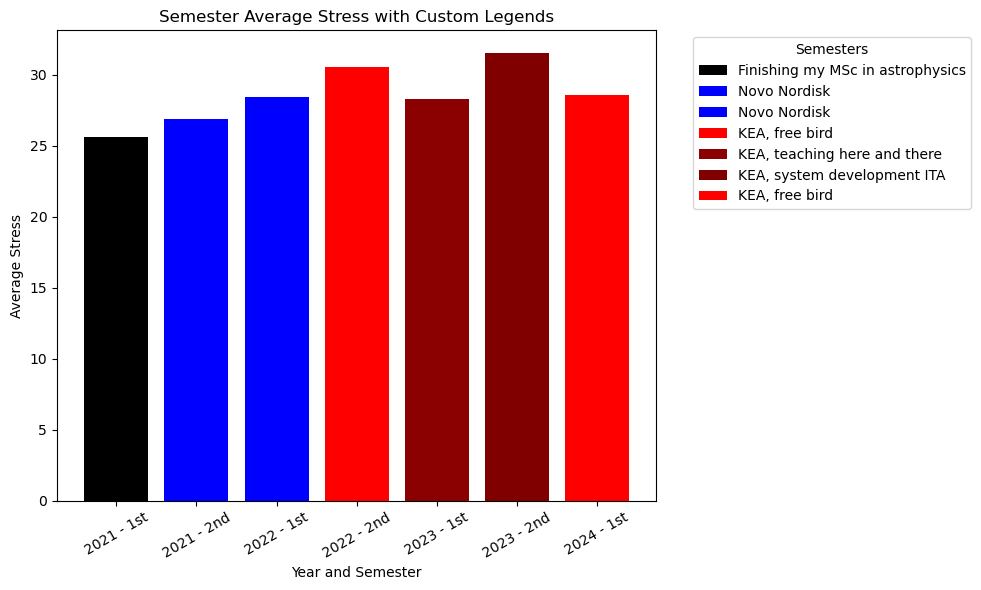

In [210]:
import matplotlib.pyplot as plt

# Sample Data Preparation
# Assume 'health_df' is prepared and datetime-indexed as previously described

# Define custom labels and colors
labels_colors = {
    "2021 - 1st": ("Finishing my MSc in astrophysics", "black"),
    "2021 - 2nd": ("Novo Nordisk", "blue"),
    "2022 - 1st": ("Novo Nordisk", "blue"),
    "2022 - 2nd": ("KEA, free bird", "red"),
    "2023 - 1st": ("KEA, teaching here and there", "darkred"),
    "2023 - 2nd": ("KEA, system development ITA", "maroon"),
    "2024 - 1st": ("KEA, free bird", "red")
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for index, value in semester_stress.items():  # Use .items() instead of .iteritems()
    color = labels_colors[index][1]
    label = labels_colors[index][0]
    bar = ax.bar(index, value, color=color, label=label)

plt.title('Semester Average Stress with Custom Legends')
plt.xlabel('Year and Semester')
plt.ylabel('Average Stress')
plt.xticks(rotation=30)

# Handling the legend to display it outside the plot
plt.legend(title='Semesters', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend outside of the plot
plt.tight_layout()

plt.show()


## Time series, average stress per month

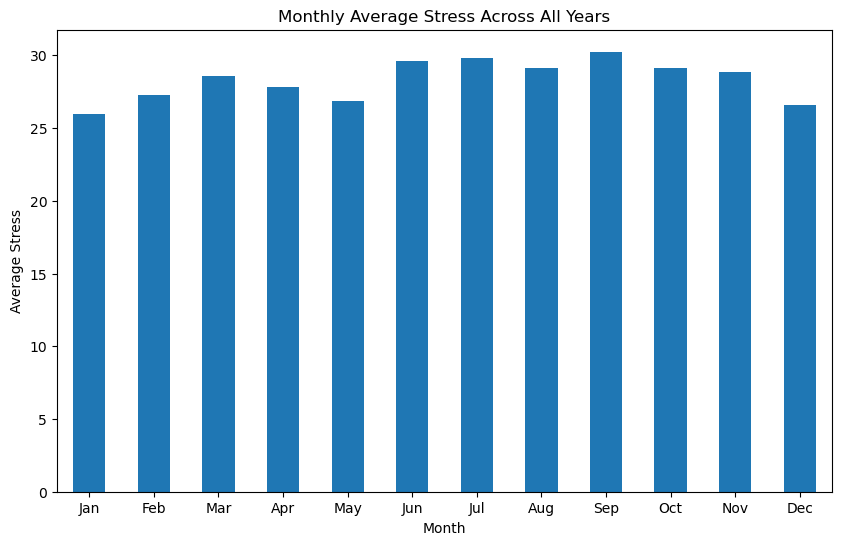

In [168]:
# Group by month regardless of year
monthly_stress = health_df['average_stress'].groupby(health_df.index.month).mean()

# Plotting
monthly_stress.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average Stress Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Stress')
plt.xticks(rotation=0, ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Setting custom labels
plt.show()


## Average stress per weekday

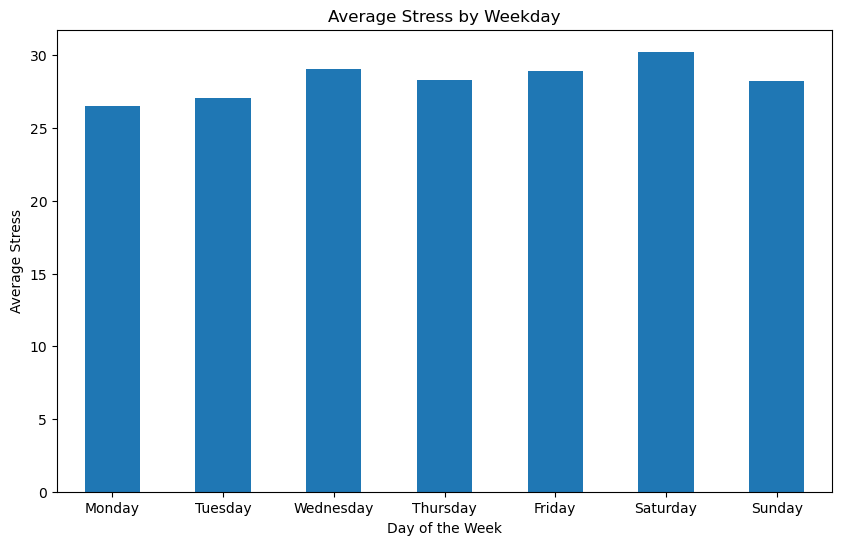

In [211]:
# Group by day of the week
weekday_stress = health_df['average_stress'].groupby(health_df.index.dayofweek).mean()

# Plotting
weekday_stress.plot(kind='bar', figsize=(10, 6))
plt.title('Average Stress by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Stress')
plt.xticks(rotation = 0, ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Setting custom labels
plt.show()


## Are there any weekdays more stressful during the different semesters?
Especially I am curious if I have been more stressed the days up to Tuesdays in 2023 - 2nd semnester.

In [212]:
# Assuming health_df has a 'Date' as index already set as datetime type
health_df['Weekday'] = health_df.index.dayofweek  # Add weekday information
health_df['Semester'] = health_df.index.month // 7 + 1  # Define semesters based on months
health_df['YearSemester'] = health_df.index.year.astype(str) + ' - ' + health_df['Semester'].replace({1: '1st', 2: '2nd'})

# Collect the average stress for each day of the week, for each semester
weekday_stress_per_semester = health_df.groupby(['YearSemester', 'Weekday'])['average_stress'].mean().unstack()


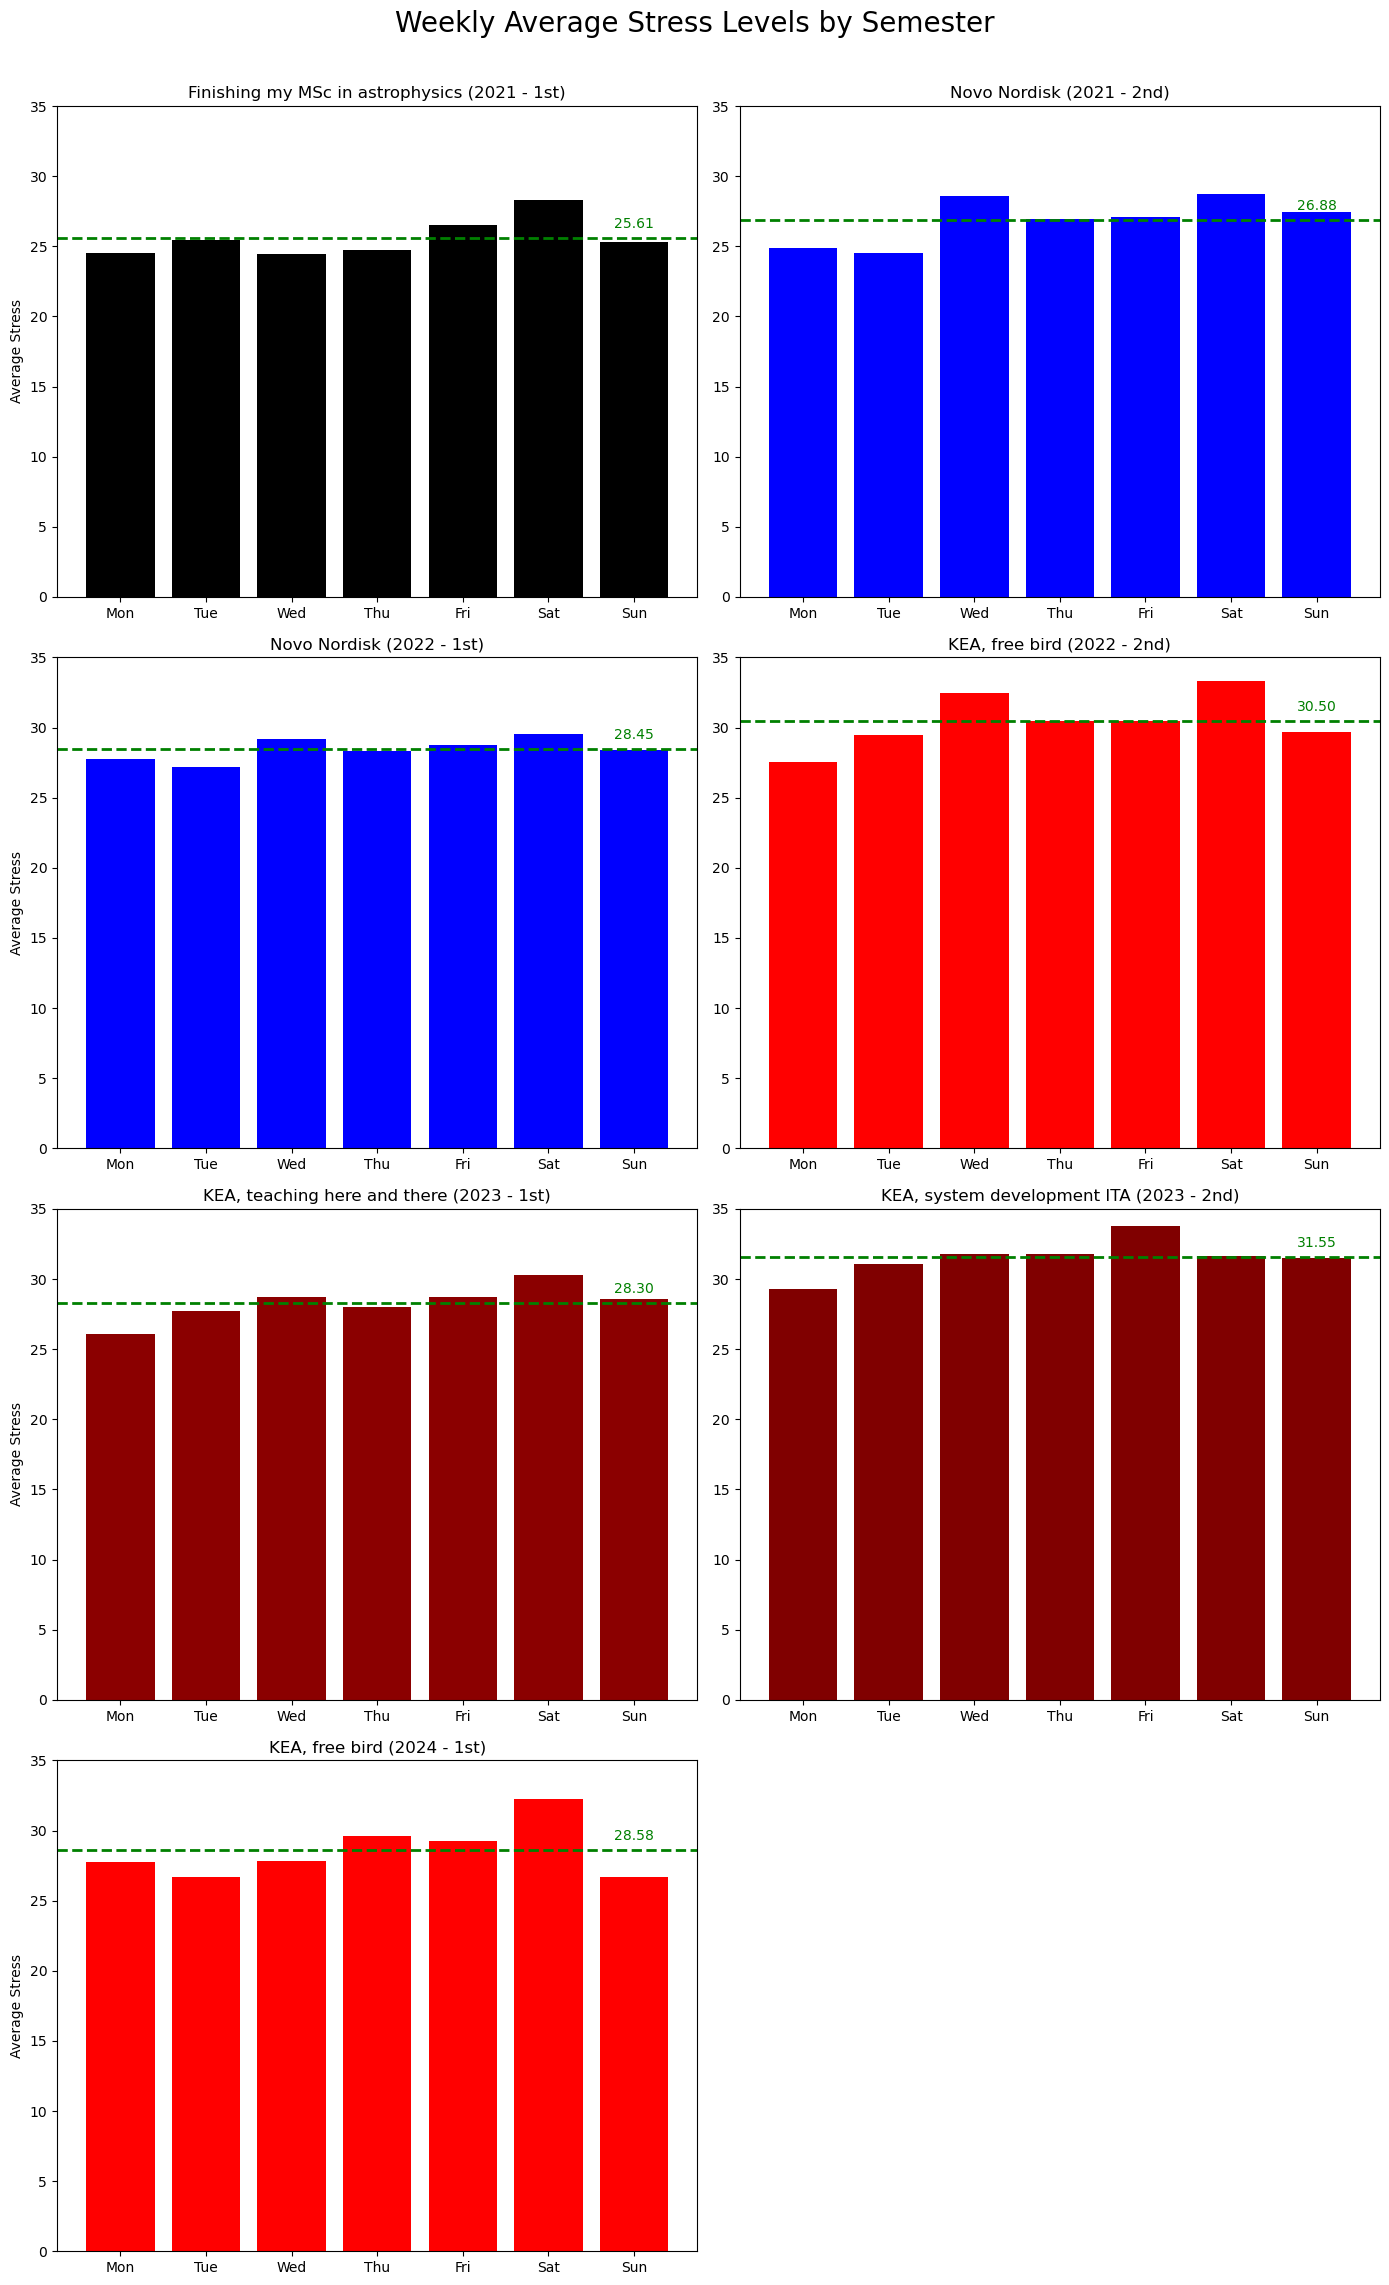

In [213]:
import matplotlib.pyplot as plt

# Adjust subplot dimensions to 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 24))  # Adjusted for additional plots
fig.suptitle('Weekly Average Stress Levels by Semester', fontsize=20)

# Flatten axes for easy iteration
axes = axes.flatten()

# Number of semesters to plot
num_semesters = len(labels_colors)

# Total number of subplots (rows * columns)
total_plots = 4 * 2  # Update this based on the actual layout of nrows x ncols

# Plot each semester's data in a different subplot
for i, (semester, data) in enumerate(weekday_stress_per_semester.iterrows()):
    if i >= num_semesters:
        break  # Break if there are more subplots than semesters
    ax = axes[i]
    color = labels_colors[semester][1]
    ax.bar(x=data.index, height=data.values, color=color)
    ax.set_title(f"{labels_colors[semester][0]} ({semester})", fontsize=12)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.set_ylabel('Average Stress' if i % 2 == 0 else '')
    ax.set_ylim(0, 35)
    mean_stress = data.mean()
    ax.axhline(y=mean_stress, color='green', linestyle='--', linewidth=2)
    ax.text(data.index[-1], mean_stress + 0.5, f'{mean_stress:.2f}', color='green', ha='center', va='bottom')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.subplots_adjust(top=0.94)  # Adjust this value to reduce the space after the title
plt.show()


Okay, so I guess, there isn't that big a difference in the weekdays. Weekends seem more physiological stressful, which would correlate with more often having a hangover during the weekends. 

It seems like the last semester, is the only one where it's Friday, not Saturday, that has most stress. It could be because I was less kean on drinking in the weekends due to teaching preparation for Tuedsays.

Also, the levels might be that high in the 2nd semester of teaching system development due to 18 days of sickness with high stress and resting heart rate. I could either remove this anomaly - or see it as a sign of overload of stress, that lead to a lower immume system and sickness. Feels like I have never been this sick in my life before.

##  Calplot of stress levels

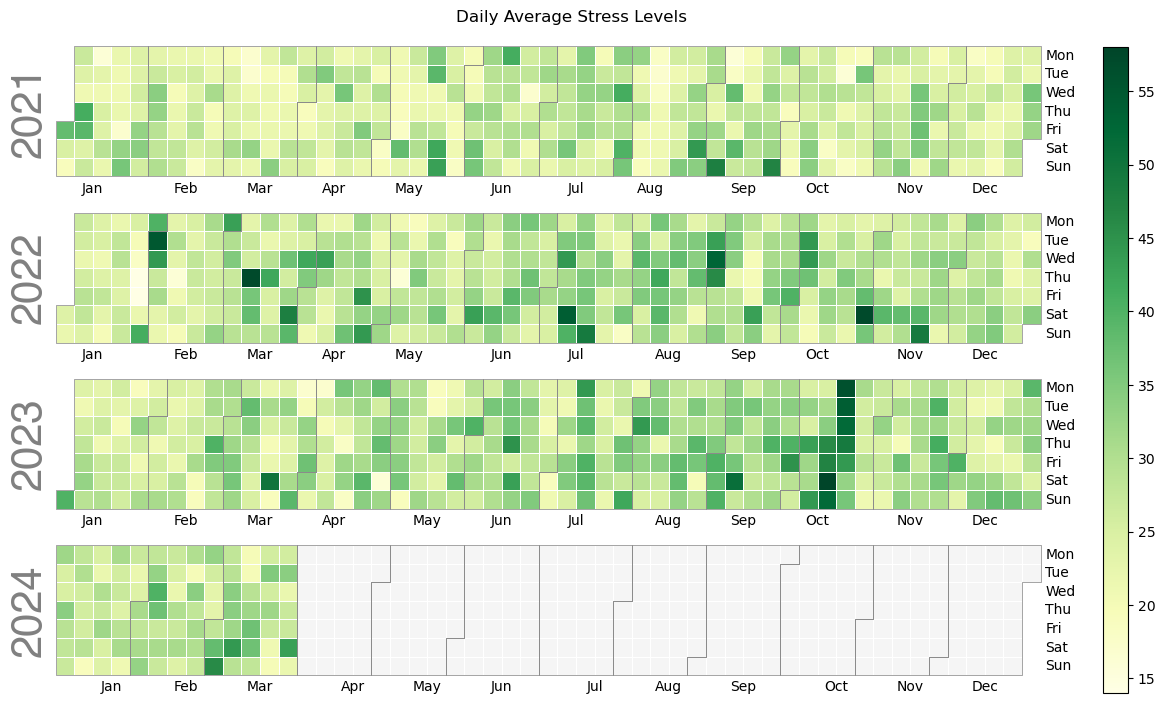

In [214]:
import calplot

calplot.calplot(data=health_df['average_stress'], cmap='YlGn', linewidth=0.5, 
                how='mean', suptitle='Daily Average Stress Levels')

plt.show()


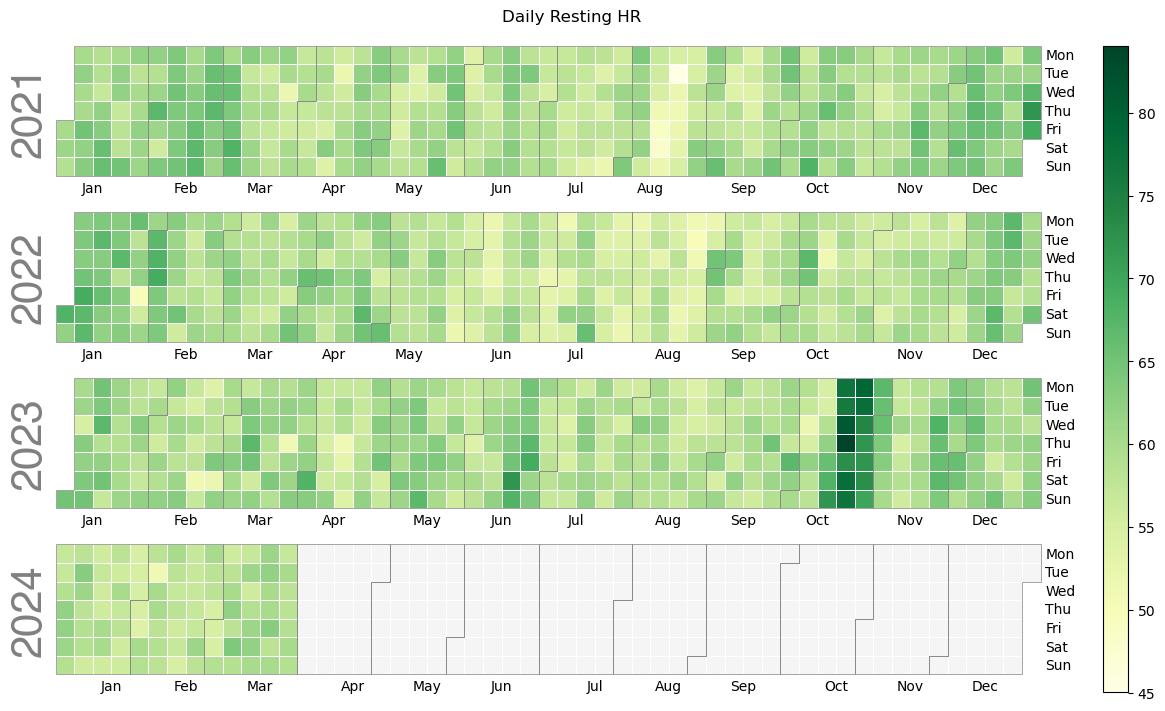

In [207]:
calplot.calplot(data=health_df['resting_HR'], cmap='YlGn', linewidth=0.5, 
                how='mean', suptitle='Daily Resting HR')

plt.show()


# Load activities

## Categories: running, swimming in pool, hiking, biking


In [120]:
#Running activities 
act_df = pd.read_csv("GarminActivities.csv")
act_df

,Unnamed: 0,VO2,Date,Km,Av_HR_for_Run,run_time,av_cadence
0,0,50.0,2024-05-04,10.02580,145.0,59.124067,174.671875
1,1,50.0,2024-05-02,8.04976,140.0,49.335650,171.328125
2,2,50.0,2024-04-30,5.86950,137.0,35.536633,175.281250
3,3,49.0,2024-04-28,6.81160,138.0,42.716883,175.906250
4,4,49.0,2024-04-26,9.13527,133.0,58.555600,172.281250
...,...,...,...,...,...,...,...
993,993,49.0,2020-11-26,9.01783,138.0,57.006750,183.703125
994,994,49.0,2020-11-25,13.10173,142.0,80.325300,184.406250
995,995,49.0,2020-11-23,4.40349,137.0,26.999217,187.765625
996,996,49.0,2020-11-22,11.34087,133.0,74.884784,182.812500
